The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


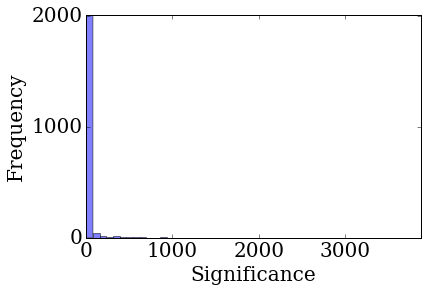

In [38]:
%load_ext autoreload
%autoreload
from hub_labels import *
from plots import *
from graph_info import *
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os

this_dir = os.path.dirname(os.path.realpath('__file__'))
labels_dir = os.path.join(this_dir, 'SF_results/SF_costs_var_B25_labels_frontier')
G_dir = os.path.join(this_dir,'Data/SF_costs_var')
#Plot significance
B=25
G = nx.read_gpickle(G_dir)
I,D,N,Id_map = read_labels(labels_dir)
significance = defaultdict(int)
for k in I[1]:
    for i in I[1][k]:
        (u,b)= Id_map[i]
        significance[u]+=1   
        
plot_hist(significance,n_bins=50,xlabel="Significance",ylabel="Frequency")        

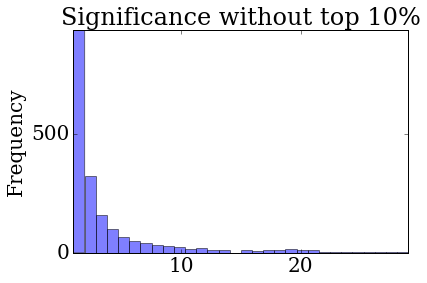

In [39]:
#Plot significance without outliers
percent = 90
cutoff = np.percentile(significance.values(),percent)
sig2 = [k for k in significance.values() if k<cutoff]
plot_hist(sig2,n_bins=30,title="Significance without top {}%".format(100-percent),ylabel="Frequency")

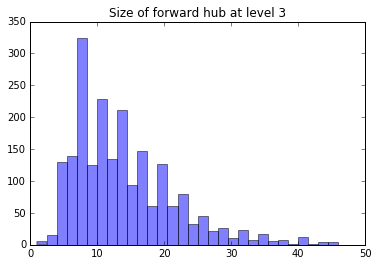

In [6]:
#Plot size of forward hubs for fixed level
b = 3
size_level = [N[0][(u,x)] for (u,x) in N[0] if x==b]
plot_hist(size_level,n_bins=30,title="Size of forward hub at level {}".format(b))

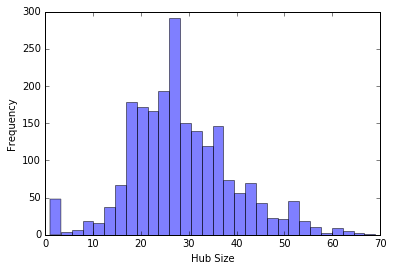

In [7]:
#Plot size of backward hubs
plot_hist(N[1],n_bins=30,xlabel="Hub Size",ylabel="Frequency",name="SF_bwd_hub_size")

In [40]:
#finds the k most sifnificant nodes
import operator
sig_vals = sorted(significance.values(),reverse=True)
k = 7
most_sig = [(u,significance[u]) for u in significance if significance[u]>=sig_vals[k]]
most_sig.sort(key=operator.itemgetter(1),reverse=True)
for (u,s) in most_sig:
    print G.node[u]['XY'][1],G.node[u]['XY'][0]

37.7854078161 -122.424712537
37.7845527649 -122.422807565
37.7765173751 -122.417513802
37.7872311891 -122.431812656
37.7847372426 -122.404546034
37.7912277891 -122.415753617
37.7772869681 -122.434872379
37.7973822359 -122.425426192


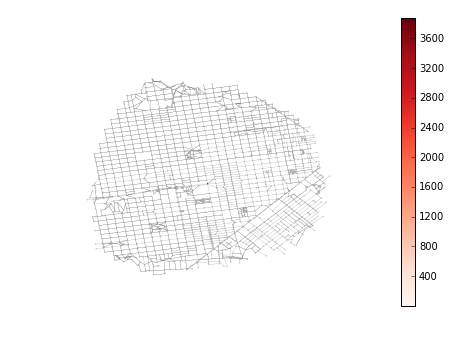

In [26]:
#plot significance
plot_node_attributes(G,significance,name='significance')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


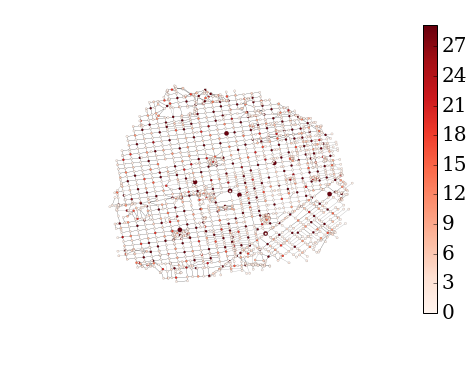

In [51]:
#Colapse some percent of the significance
%load_ext autoreload
%autoreload
percent = 90
cutoff = np.percentile(significance.values(),percent)
colapse = {}
for v in G.nodes():
    if significance[v]>cutoff:
        colapse[v] = cutoff
    else:
        colapse[v] = significance[v]
big_nodes = [u for (u,s) in most_sig]
plot_node_attributes(G,colapse,big_nodes=big_nodes,name='sig_colapse')

In [26]:
import gmplot
lats = []
lons = []
for k in I[1]:
    for i in I[1][k]:
        (u,b) = Id_map[i]
        (x,y) = G.node[u]['XY']
        lats.append(y)
        lons.append(x)
gmap = gmplot.GoogleMapPlotter(37.784852, -122.416782, 14)
gmap.heatmap(lats,lons,opacity=1,radius=15)
gmap.draw("SF_significance_heatmap.html")

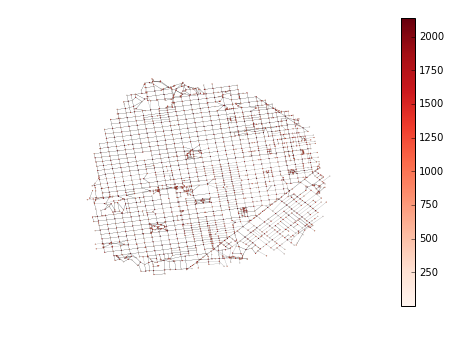

In [8]:
#plot ranking of nodes
C_dir = os.path.join(this_dir,'SF_data/SF_data_C')
with open(C_dir, "rb") as f:
    dic = pickle.load(f)
C = dic['C']
rank = {}
for i in xrange(0,len(C)):
    rank[C[i]] = 1+len(C)-i
plot_node_attributes(G,rank,name="rank")  

In [ ]:
#Draw hub of an specific node
v=most_sig[0]
belongs = {}
for u in G.nodes():
    if u in I[1][(u,0)]
plot_node_attributes(G,belongs,big_nodes=big_nodes,name='sig_colapse')

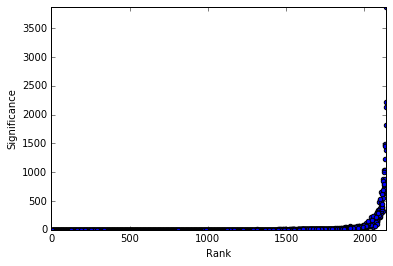

In [9]:
#Relation between rank and significance
x = []
y = []
for u in G.nodes():
    y.append(significance[u])
    x.append(rank[u])
plt.scatter(x,y)
plt.xlim(0, max(x))
plt.ylim(0, max(y))
plt.xlabel("Rank")
plt.ylabel("Significance")
plt.show()

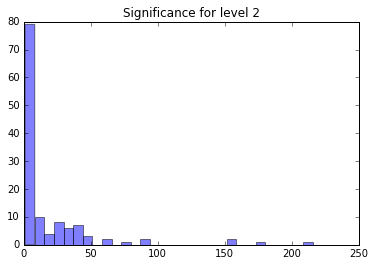

In [10]:
#For fixed b, significance of nodes (v,b)
b = 2
signi_b = defaultdict(int)
for k in I[1]:
    for i in I[1][k]:
        (u,x) = Id_map[i]
        if x == b:
            signi_b[u]+=1 
plot_hist(signi_b,title="Significance for level {}".format(b))

In [37]:
#Colapse some percent of the level significance
percent = 90
cutoff = np.percentile(signi_b.values(),percent)
colapse = {}
for v in G.nodes():
    if signi_b[v]>cutoff:
        colapse[v] = cutoff
    else:
        colapse[v] = signi_b[v]
plot_node_attributes(G,colapse,name="significance_level{}".format(b))

NameError: name 'signi_b' is not defined

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


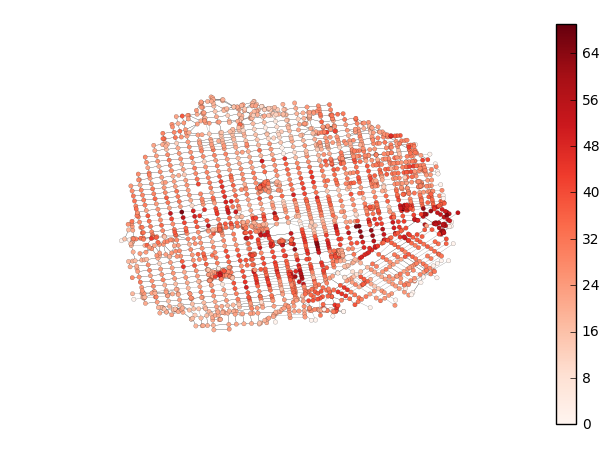

In [3]:
%load_ext autoreload
%autoreload
back_sizes = {}
for u in G.nodes():
    if (u,0) not in N[1]:
        back_sizes[u] = 0
    else:
        back_sizes[u] = N[1][(u,0)]
plot_node_attributes(G,back_sizes,'hub_sizes')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


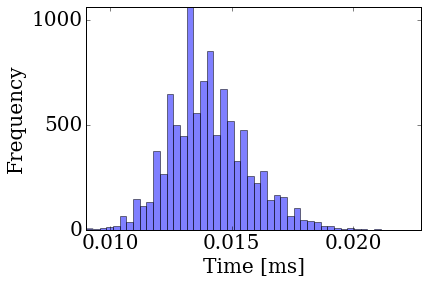

In [35]:
%load_ext autoreload
%autoreload
hl_time = []
import matplotlib



time_dir = os.path.join(this_dir, 'SF_results/SF_times_hl_B25_full.txt')
with open(time_dir) as input_file:
    for line in input_file:
        line = line.strip()
        hl_time.append(float(line))
plot_hist(hl_time,n_bins=50,xlabel="Time [ms]", ylabel="Frequency",name="SF_query_hl_B25",nticks=4)

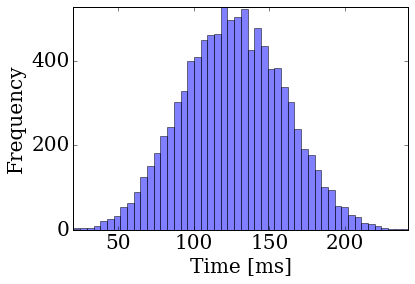

In [36]:
dij_time = []
time_dir = os.path.join(this_dir, 'SF_results/SF_times_dij_B25_full.txt')
with open(time_dir) as input_file:
    for line in input_file:
        line = line.strip()
        dij_time.append(float(line))
plot_hist(dij_time,n_bins=50,xlabel="Time [ms]", ylabel="Frequency",name="SF_query_dij_B25",nticks=5)

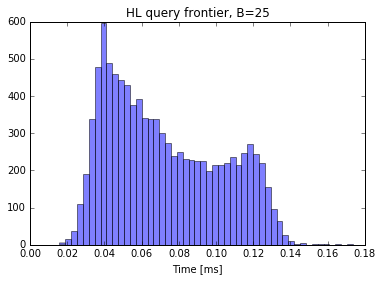

In [15]:
hl_time = []
time_dir = os.path.join(this_dir, 'SF_results/SF_times_hl_B25_frontier.txt')
with open(time_dir) as input_file:
    for line in input_file:
        line = line.strip()
        hl_time.append(float(line))
plot_hist(hl_time,n_bins=50,title="HL query frontier, B=25",xlabel="Time [ms]")

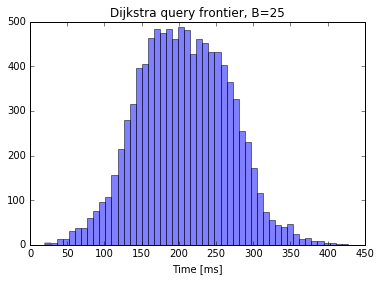

In [16]:
dij_time = []
time_dir = os.path.join(this_dir, 'SF_results/SF_times_dij_B25_frontier.txt')
with open(time_dir) as input_file:
    for line in input_file:
        line = line.strip()
        dij_time.append(float(line))
plot_hist(dij_time,n_bins=50,title="Dijkstra query frontier, B=25",xlabel="Time [ms]")